In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2022-04-24 12:03:40.687693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-24 12:03:40.687776: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
generator = keras.models.load_model('msgGeneratorCifar10.h5')
latent_dim = generator.input.shape[1]
print(f"Generator model loaded with latent dim: {latent_dim}")

2022-04-24 12:03:43.115416: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-24 12:03:43.115454: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-24 12:03:43.115479: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-04-24 12:03:43.115727: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Generator model loaded with latent dim: 100


In [3]:
# Saját modell az inception v3 alapjaira (Transfer learning)
# (32, 32, 3)-as képeket vár bemenetként, majd one-hot encoding alapján adja ki a classokat (3 class)
# nem logits kimenetű
inception_model = keras.models.load_model('datas/cifar10Classifier.h5')

In [4]:
# Gradient Descent with momentum
cross_entropy = keras.losses.CategoricalCrossentropy(from_logits=False)

def gradient_descent_momentum(goal_label, starting_noise, step_size, momentum, steps, verbose=False):
    noise = tf.Variable(starting_noise, name='noise')
    
    result_noises = []
    losses = []
    preds = []
    
    change = 0
    for i in range(steps):
        with tf.GradientTape() as g_tape:
            g_tape.watch(noise)

            generated_image = generator(noise, training=False)[0]
            
            predictions = inception_model(generated_image)
            
            loss = cross_entropy(goal_label, predictions[0])
            
            
        result_noises.append(noise)
        preds.append(predictions[0])
        losses.append(loss)

        gradients = g_tape.gradient(loss, noise)
        change = (step_size * gradients) + momentum * change
        noise = noise - change

        if(verbose):
            print(predictions)
            print(f"Step: {i}, Loss: {loss}")
            plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
            plt.show()

    return result_noises, losses, preds

In [5]:
def make_onehot_from_dict(input_data):
    return [
        input_data['airplane'],
        input_data['automobile'],
        input_data['bird'],
        input_data['cat'],
        input_data['deer'],
        input_data['dog'],
        input_data['frog'],
        input_data['horse'],
        input_data['ship'],
        input_data['truck']
    ]

tf.Tensor(
[[0.03741443 0.01283226 0.00560444 0.03114289 0.0307616  0.00609233
  0.02851774 0.07346887 0.33056977 0.44359562]], shape=(1, 10), dtype=float32)
Step: 0, Loss: 5.100724220275879


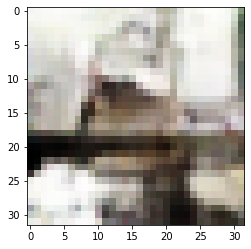

tf.Tensor(
[[0.01115006 0.0790533  0.0455648  0.32241997 0.19245669 0.0091589
  0.15278094 0.07289414 0.01331409 0.10120709]], shape=(1, 10), dtype=float32)
Step: 1, Loss: 4.693028926849365


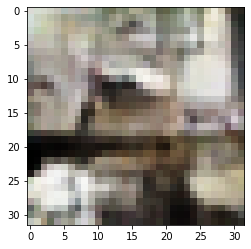

tf.Tensor(
[[0.01335259 0.01773884 0.03459269 0.30669197 0.1897068  0.01805651
  0.07040037 0.31171182 0.01332773 0.02442079]], shape=(1, 10), dtype=float32)
Step: 2, Loss: 4.014248847961426


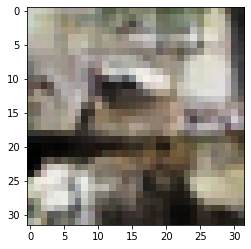

tf.Tensor(
[[0.00236456 0.00370451 0.05527523 0.3843525  0.0824936  0.08660361
  0.08844173 0.2868426  0.0011154  0.00880621]], shape=(1, 10), dtype=float32)
Step: 3, Loss: 2.44641375541687


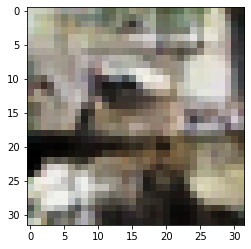

tf.Tensor(
[[0.01462617 0.02404866 0.05894018 0.09643576 0.11053194 0.05250965
  0.07004666 0.41433987 0.10626154 0.0522596 ]], shape=(1, 10), dtype=float32)
Step: 4, Loss: 2.946758270263672


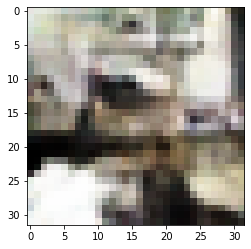

tf.Tensor(
[[0.00801359 0.00646134 0.08543845 0.1572685  0.02576604 0.16294153
  0.1143143  0.4187468  0.00130672 0.01974273]], shape=(1, 10), dtype=float32)
Step: 5, Loss: 1.8143638372421265


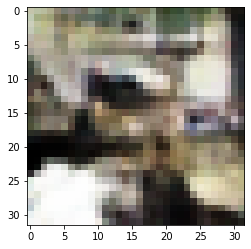

tf.Tensor(
[[0.00107881 0.00233023 0.00740252 0.14396252 0.03960194 0.6640291
  0.01920054 0.11473527 0.0014337  0.00622532]], shape=(1, 10), dtype=float32)
Step: 6, Loss: 0.40942928194999695


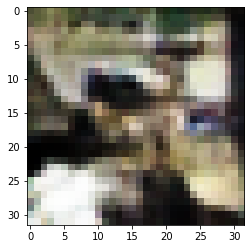

tf.Tensor(
[[0.00310323 0.00293041 0.02764663 0.51206154 0.04490981 0.2182755
  0.01592177 0.16588657 0.0039741  0.00529053]], shape=(1, 10), dtype=float32)
Step: 7, Loss: 1.521997332572937


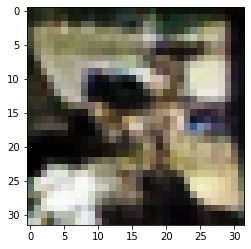

tf.Tensor(
[[0.00424896 0.01661239 0.06072639 0.20387341 0.06109557 0.24810353
  0.0206112  0.3578961  0.00306415 0.02376827]], shape=(1, 10), dtype=float32)
Step: 8, Loss: 1.3939090967178345


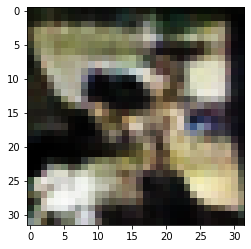

tf.Tensor(
[[0.00623071 0.01752803 0.04106989 0.14696757 0.08081739 0.53824604
  0.01694837 0.12415756 0.00560997 0.02242445]], shape=(1, 10), dtype=float32)
Step: 9, Loss: 0.6194394826889038


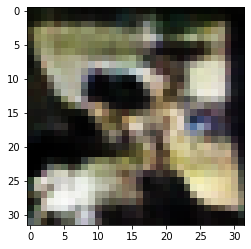

tf.Tensor(
[[8.1593124e-04 6.2990091e-03 1.6905585e-02 5.7828158e-02 6.2342058e-03
  8.1146699e-01 2.3623420e-02 6.0866464e-02 7.8048767e-04 1.5179718e-02]], shape=(1, 10), dtype=float32)
Step: 10, Loss: 0.20891156792640686


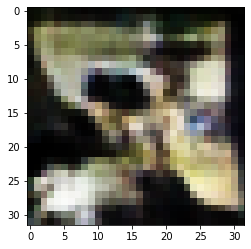

tf.Tensor(
[[5.3038920e-04 1.4586808e-03 6.0669756e-03 1.9079766e-01 7.6491870e-03
  7.4239427e-01 1.8451750e-02 2.2105800e-02 4.6710717e-03 5.8742780e-03]], shape=(1, 10), dtype=float32)
Step: 11, Loss: 0.29787489771842957


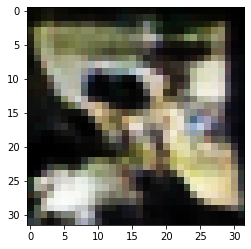

tf.Tensor(
[[3.6011584e-04 8.7062479e-04 5.2138688e-03 1.6588145e-01 3.4559597e-03
  7.8966159e-01 1.8563792e-02 1.0749192e-02 2.8838473e-03 2.3596047e-03]], shape=(1, 10), dtype=float32)
Step: 12, Loss: 0.2361508011817932


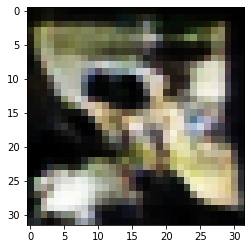

tf.Tensor(
[[0.0009365  0.00561681 0.01292037 0.0967028  0.00703084 0.7780091
  0.0136797  0.07135136 0.00220071 0.01155177]], shape=(1, 10), dtype=float32)
Step: 13, Loss: 0.2510170340538025


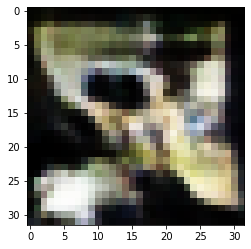

tf.Tensor(
[[0.00140831 0.00354364 0.00930587 0.09830262 0.00635575 0.71137905
  0.00194797 0.1622406  0.00092299 0.0045932 ]], shape=(1, 10), dtype=float32)
Step: 14, Loss: 0.3405497968196869


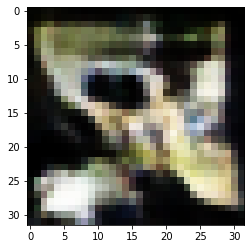

tf.Tensor(
[[0.00090373 0.003424   0.01493764 0.07586669 0.01320652 0.80880374
  0.00836456 0.06916083 0.00197841 0.00335397]], shape=(1, 10), dtype=float32)
Step: 15, Loss: 0.2121991366147995


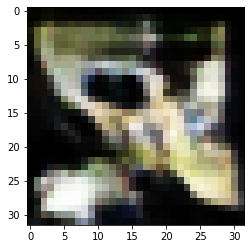

tf.Tensor(
[[0.01127205 0.01044619 0.02233174 0.27293035 0.05916201 0.47593647
  0.02022268 0.09412597 0.01060566 0.02296687]], shape=(1, 10), dtype=float32)
Step: 16, Loss: 0.742470920085907


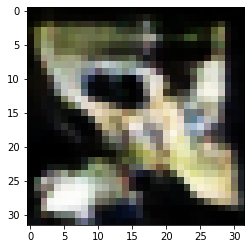

tf.Tensor(
[[4.5797662e-04 6.7925691e-03 1.6985489e-02 1.5230124e-01 4.8937011e-03
  7.4476564e-01 5.0763711e-02 1.4296352e-02 2.5997451e-03 6.1435634e-03]], shape=(1, 10), dtype=float32)
Step: 17, Loss: 0.29468560218811035


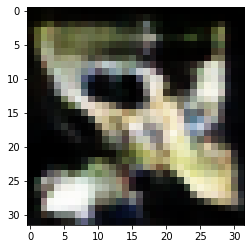

tf.Tensor(
[[2.2426342e-04 4.4641810e-04 4.5362571e-03 5.7662141e-02 2.7478102e-03
  9.2454433e-01 3.0540151e-03 4.1766413e-03 1.5205567e-03 1.0875161e-03]], shape=(1, 10), dtype=float32)
Step: 18, Loss: 0.07845427095890045


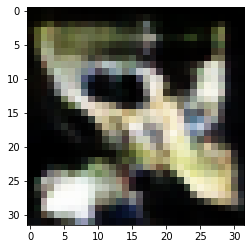

tf.Tensor(
[[1.3884204e-04 4.7358815e-04 4.0414915e-03 4.0232081e-02 1.2001869e-03
  9.4282889e-01 6.1061666e-03 2.3883765e-03 1.8729060e-03 7.1744522e-04]], shape=(1, 10), dtype=float32)
Step: 19, Loss: 0.05887046083807945


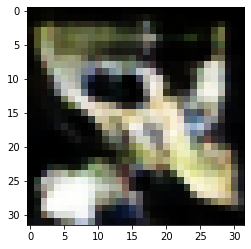

tf.Tensor(
[[0.00605022 0.02174343 0.03015823 0.1474852  0.03193231 0.66082424
  0.01313074 0.04334277 0.0341347  0.01119826]], shape=(1, 10), dtype=float32)
Step: 20, Loss: 0.414267361164093


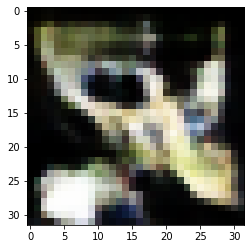

tf.Tensor(0.41426736, shape=(), dtype=float32)


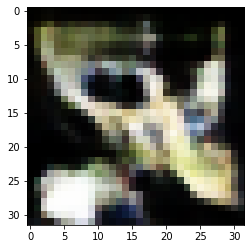

In [6]:
# TODO: a keresést egyszerre több elemre végezni, hogy ne egymás után kelljen

# Strukturált adat
input_data = {
    "airplane": 0.0,
    "automobile": 0.0,
    "bird": 0.0,
    "cat": 0.0,
    "deer": 0.0,
    "dog": 1.0,
    "frog": 0.0,
    "horse": 0.0,
    "ship": 0.0,
    "truck": 0.0
}

# Visszakeresés a valószínűségi értékek alapján
goal_prediction = make_onehot_from_dict(input_data)

#starting_noise = tf.random.uniform([1, latent_dim], minval=-2, maxval=2)
starting_noise = tf.random.normal([1, latent_dim])
#starting_noise = tf.random.truncated_normal([1, latent_dim])
#starting_noise = result_noises[-1]
step_size = 0.03
momentum = 0.8

n_steps = 21

result_noises, losses, preds =\
    gradient_descent_momentum(goal_prediction, starting_noise, step_size, momentum, n_steps, verbose=True)

print(losses[-1])
generated_image = generator(result_noises[-1], training=False)[0]
plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
plt.show()

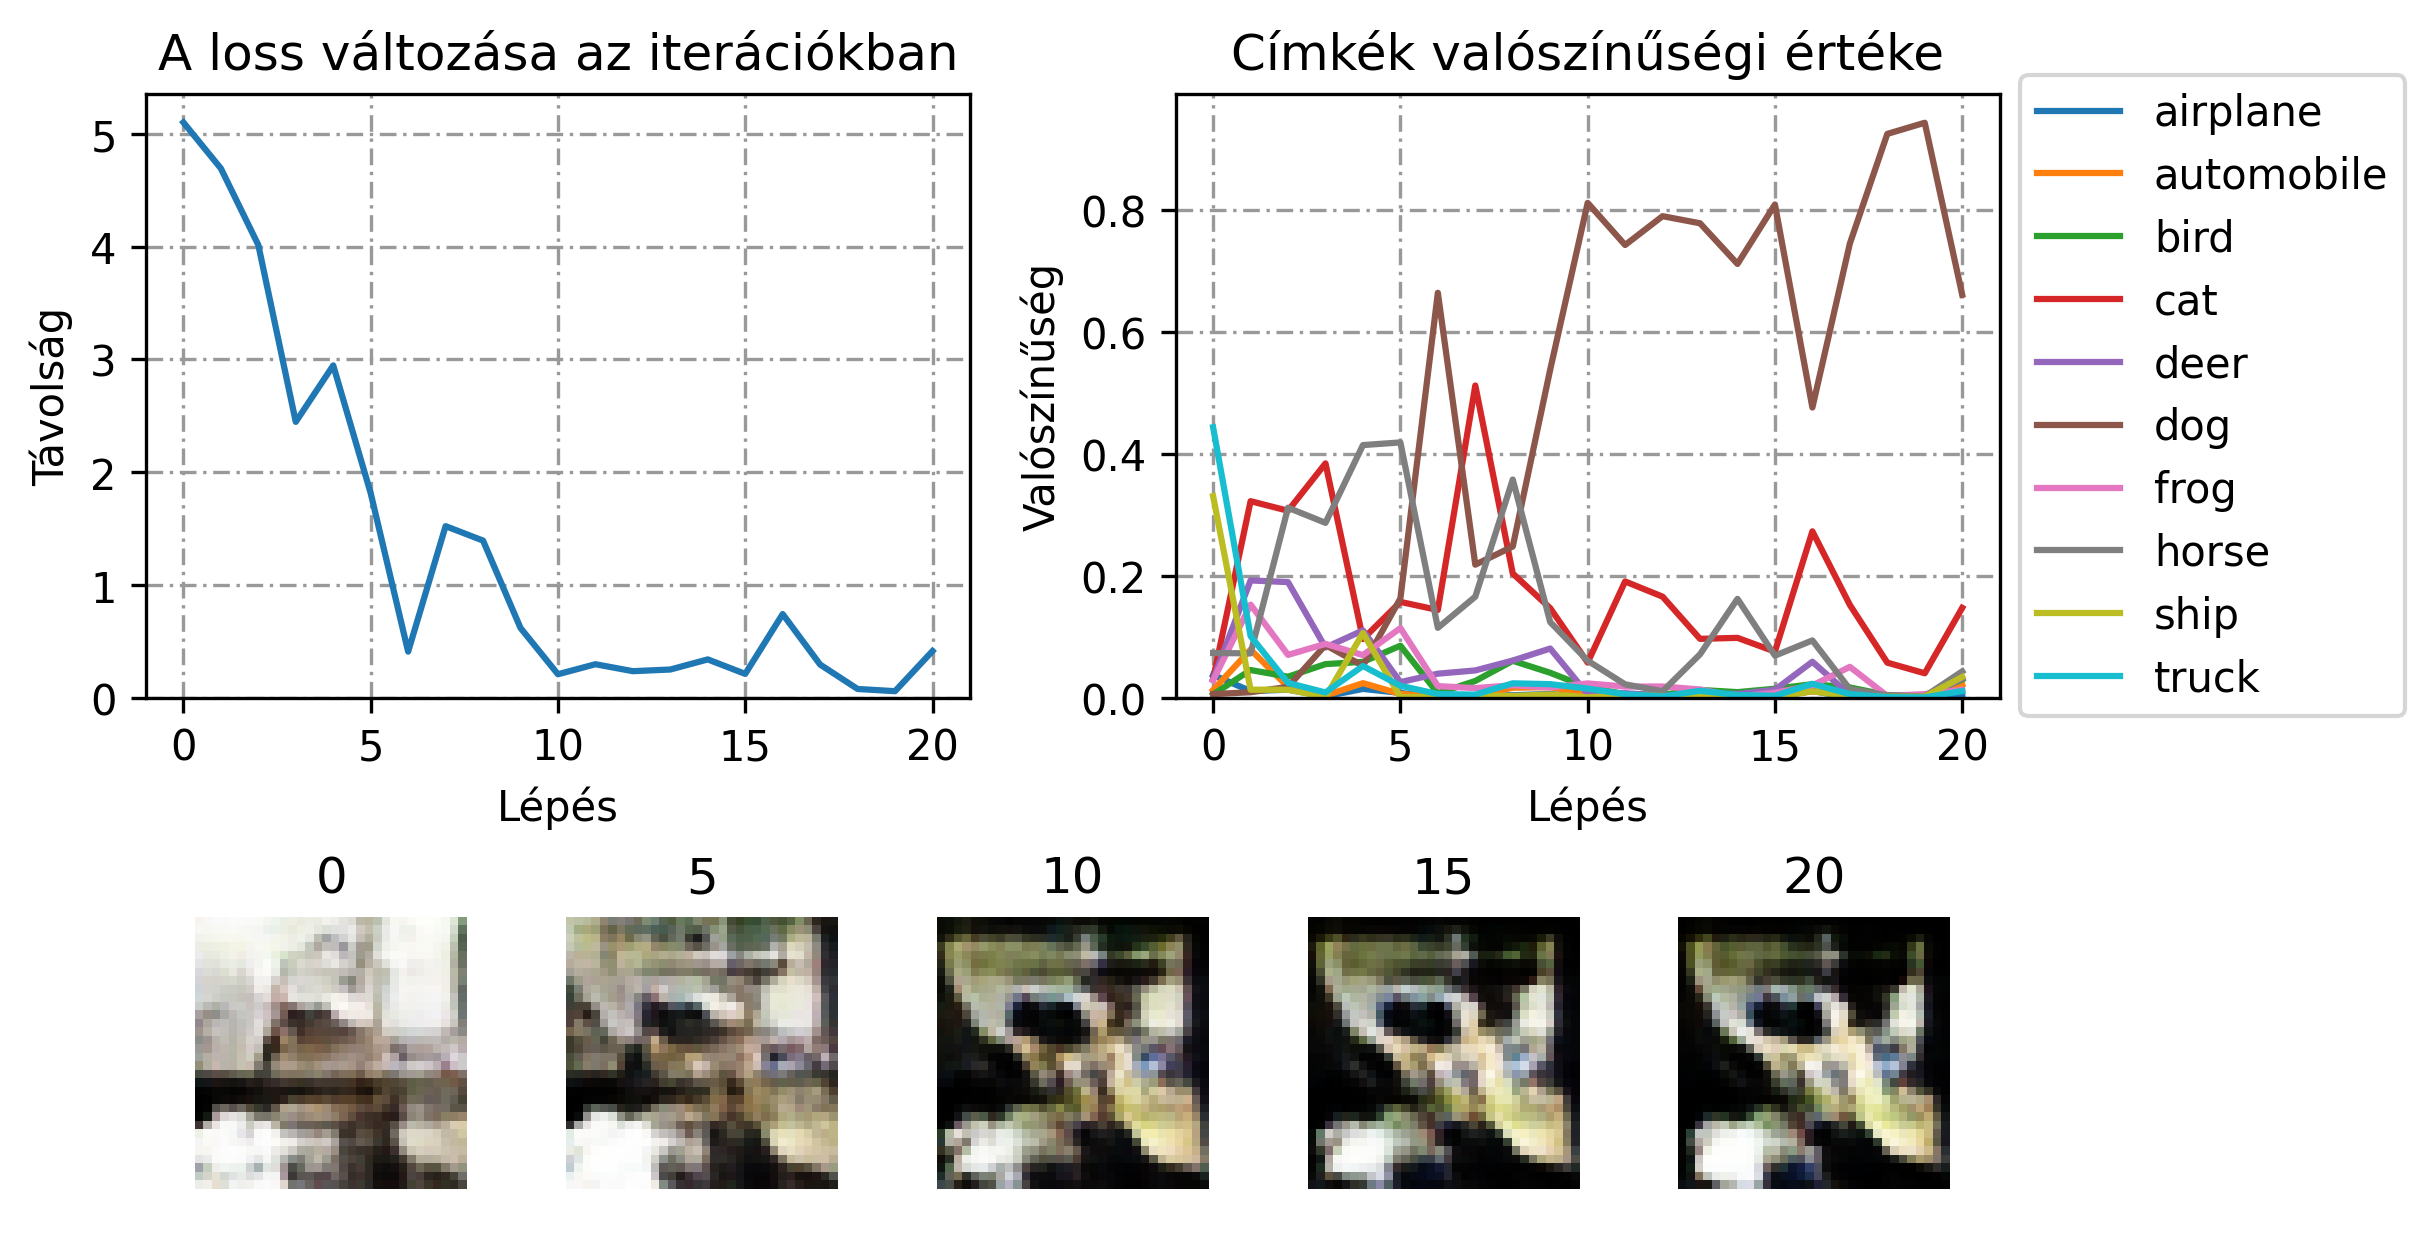

In [7]:
fig = plt.figure(figsize=(8, 4), dpi=300, constrained_layout=True)
axs = fig.subplot_mosaic([['Losses', 'Classes'],['Images', 'Images']],
                          gridspec_kw={'width_ratios':[2, 2], 'height_ratios':[2, 1]})
axs['Losses'].set_xlabel('Lépés')
axs['Losses'].set_ylabel('Távolság')
axs['Losses'].set_title('A loss változása az iterációkban')
axs['Losses'].grid(True, color='0.6', dashes=(5, 2, 1, 2))
axs['Losses'].plot(losses)
axs['Losses'].set_ylim(bottom=0)

axs['Classes'].set_ylabel('Valószínűség')
axs['Classes'].set_xlabel('Lépés')
axs['Classes'].set_title('Címkék valószínűségi értéke')

axs['Classes'].grid(True, color='0.6', dashes=(5, 2, 1, 2))

axs['Classes'].plot(preds, label=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

axs['Classes'].set_ylim(bottom=0)
axs['Classes'].legend(loc='center left', bbox_to_anchor=(1, 0.5))

inserted = []
axs['Images'].axis('off')
pad = 0.01
inserted.append(axs['Images'].inset_axes([0.0, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.2, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.4, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.6, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.8, 0.05, 0.2, 0.9]))

for i in range(5):
    generated_image = generator(result_noises[i*5], training=False)[0]
    inserted[i].axis('off')
    inserted[i].set_title(i*5)
    inserted[i].imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
plt.show()

In [8]:
# Egy kutya és egy macska keresése, majd interpoláció a kettő között:

# Strukturált adat
input_data = {
    "airplane": 0.0,
    "automobile": 0.0,
    "bird": 0.0,
    "cat": 0.0,
    "deer": 0.0,
    "dog": 1.0,
    "frog": 0.0,
    "horse": 0.0,
    "ship": 0.0,
    "truck": 0.0
}

# Visszakeresés a valószínűségi értékek alapján
dog_label = make_onehot_from_dict(input_data)

# Strukturált adat
input_data = {
    "airplane": 0.0,
    "automobile": 0.0,
    "bird": 0.0,
    "cat": 1.0,
    "deer": 0.0,
    "dog": 0.0,
    "frog": 0.0,
    "horse": 0.0,
    "ship": 0.0,
    "truck": 0.0
}

# Visszakeresés a valószínűségi értékek alapján
cat_label = make_onehot_from_dict(input_data)

starting_noise = tf.random.normal([1, latent_dim])
dog_noise, _, _ =\
        gradient_descent_momentum(dog_label, starting_noise, 0.03, 0.8, 20, verbose=False)

starting_noise = tf.random.normal([1, latent_dim])
cat_noise, _, _ =\
        gradient_descent_momentum(cat_label, starting_noise, 0.03, 0.8, 20, verbose=False)

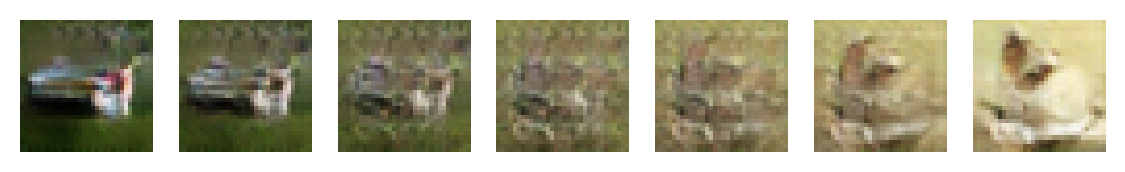

In [9]:
from scipy.interpolate import interp1d
import numpy as np

step_size = 8
linfit = interp1d([1, step_size], np.vstack([dog_noise[-1], cat_noise[-1]]), axis=0)

res = []
for j in range(1,step_size):
    generated_image = generator(linfit(j).reshape(1, latent_dim), training=False)[0]
    res.append(generated_image)
        
fig, axes = plt.subplots(figsize=(len(res), 1), nrows=1, ncols=len(res), dpi=200)
for i in range(len(res)):
    gen_1 = res[i][0].numpy()*127.5+127.5
    axes[i].axis('off')
    axes[i].imshow((gen_1).astype("uint8"), interpolation='none')
plt.show()

2022-04-24 12:05:13.467737: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


0.013298691 0.0013666602


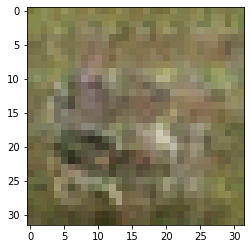

In [10]:
pon = 3

plt.imshow((res[pon][0].numpy()*127.5+127.5).astype("uint"))

result = inception_model.predict(res[pon])
print(result[0][3], result[0][5])

tf.Tensor(
[[0.00625461 0.02282569 0.06749496 0.3097276  0.01133313 0.14673015
  0.07525849 0.0957771  0.01776689 0.24683137]], shape=(1, 10), dtype=float32)
Step: 0, Loss: 3.062800168991089


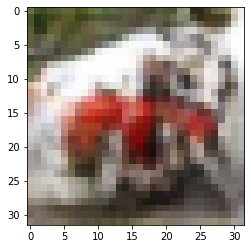

tf.Tensor(
[[0.02732071 0.27717397 0.07123221 0.12597238 0.02293107 0.06626117
  0.02096046 0.14636986 0.02505931 0.21671882]], shape=(1, 10), dtype=float32)
Step: 1, Loss: 1.6023640632629395


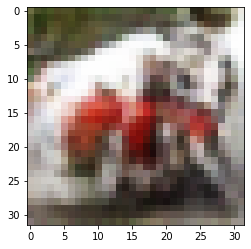

tf.Tensor(
[[2.6769617e-03 6.0462955e-02 1.5933980e-03 2.1749666e-02 7.7827321e-04
  5.1421588e-03 1.4446306e-03 6.0366318e-03 1.8007614e-02 8.8210773e-01]], shape=(1, 10), dtype=float32)
Step: 2, Loss: 3.9578166007995605


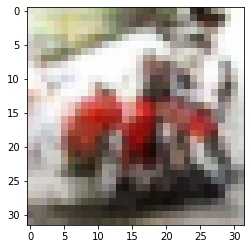

tf.Tensor(
[[0.02569631 0.02380766 0.02433997 0.2966246  0.00340911 0.12691681
  0.05841701 0.04572717 0.03436825 0.36069316]], shape=(1, 10), dtype=float32)
Step: 3, Loss: 3.411405324935913


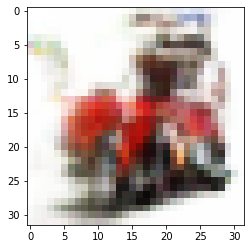

tf.Tensor(
[[0.17712589 0.08710503 0.04947513 0.14527585 0.01778441 0.06689114
  0.07721197 0.0995421  0.01754914 0.26203924]], shape=(1, 10), dtype=float32)
Step: 4, Loss: 2.3739075660705566


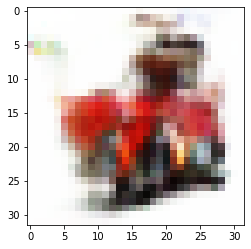

tf.Tensor(
[[0.04377436 0.07502785 0.01926499 0.3952767  0.00735269 0.0740039
  0.04540681 0.0708506  0.04572958 0.22331253]], shape=(1, 10), dtype=float32)
Step: 5, Loss: 2.6185388565063477


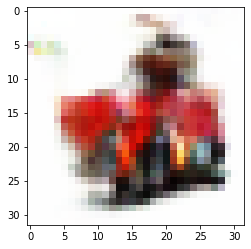

tf.Tensor(
[[0.06070451 0.24203952 0.01270789 0.21187858 0.00187634 0.06153643
  0.00650386 0.01510241 0.02037238 0.3672781 ]], shape=(1, 10), dtype=float32)
Step: 6, Loss: 2.8057777881622314


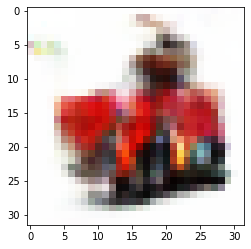

tf.Tensor(
[[0.02705792 0.26859516 0.01678927 0.23214798 0.00164222 0.11285945
  0.01617184 0.01701559 0.01065222 0.2970684 ]], shape=(1, 10), dtype=float32)
Step: 7, Loss: 2.694087505340576


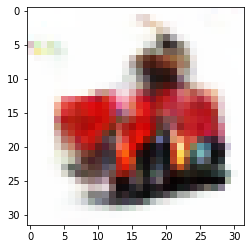

tf.Tensor(
[[0.01299664 0.19978768 0.00692011 0.20494586 0.00307823 0.20543933
  0.01136628 0.04118972 0.00355473 0.31072143]], shape=(1, 10), dtype=float32)
Step: 8, Loss: 2.400033473968506


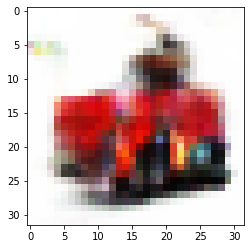

tf.Tensor(
[[8.8542420e-03 9.2495985e-02 4.8267497e-03 1.0713745e-02 6.8994594e-04
  6.9680973e-03 2.8815297e-03 7.6181982e-03 1.7371908e-02 8.4757960e-01]], shape=(1, 10), dtype=float32)
Step: 9, Loss: 3.6289026737213135


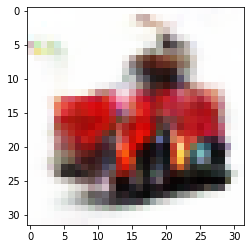

tf.Tensor(
[[0.06376725 0.1431948  0.03107255 0.04030998 0.00327986 0.0169815
  0.00964662 0.02656573 0.03109081 0.63409096]], shape=(1, 10), dtype=float32)
Step: 10, Loss: 2.785841226577759


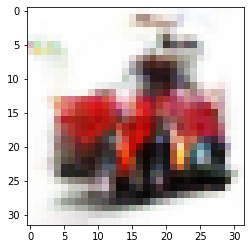

tf.Tensor(
[[0.05532453 0.06952441 0.01488169 0.23390308 0.01042982 0.08107547
  0.08901231 0.09145086 0.01306259 0.34133524]], shape=(1, 10), dtype=float32)
Step: 11, Loss: 2.52901554107666


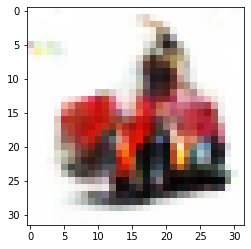

tf.Tensor(
[[0.04889134 0.2462327  0.02043828 0.14602515 0.00709847 0.07988198
  0.02931246 0.06208793 0.03749746 0.32253426]], shape=(1, 10), dtype=float32)
Step: 12, Loss: 2.090341091156006


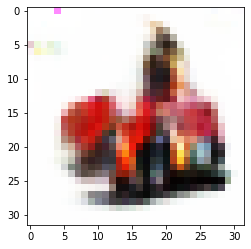

tf.Tensor(
[[0.11868046 0.15047407 0.03146262 0.18878898 0.00277881 0.06156337
  0.00562806 0.05564945 0.1446836  0.24029054]], shape=(1, 10), dtype=float32)
Step: 13, Loss: 2.3913238048553467


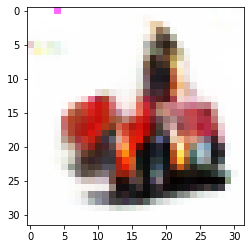

tf.Tensor(
[[5.2976549e-02 3.9756158e-01 1.0409601e-02 4.8245955e-02 8.5967197e-04
  4.1969951e-02 3.5676785e-04 8.8193029e-02 1.8275586e-01 1.7667113e-01]], shape=(1, 10), dtype=float32)
Step: 14, Loss: 1.675316572189331


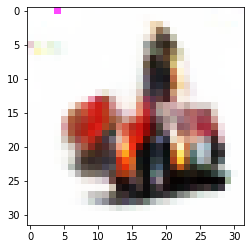

tf.Tensor(
[[0.21783657 0.07003142 0.04474139 0.08017553 0.00767112 0.04024243
  0.00656407 0.02592843 0.06832156 0.4384875 ]], shape=(1, 10), dtype=float32)
Step: 15, Loss: 3.155613422393799


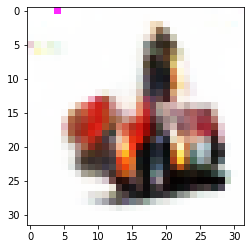

tf.Tensor(
[[0.03983485 0.40210426 0.03042143 0.0742334  0.00225818 0.02148382
  0.03786066 0.0046038  0.02207139 0.3651282 ]], shape=(1, 10), dtype=float32)
Step: 16, Loss: 3.145958185195923


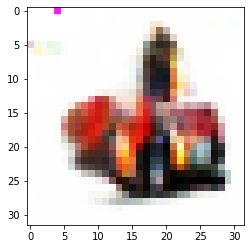

tf.Tensor(
[[0.04712648 0.34640348 0.01330395 0.04135956 0.00196829 0.03388184
  0.00158185 0.05949701 0.01556535 0.43931222]], shape=(1, 10), dtype=float32)
Step: 17, Loss: 1.9409900903701782


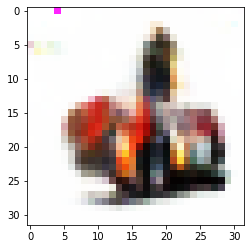

tf.Tensor(
[[0.0486401  0.43004856 0.00678635 0.05894146 0.0042775  0.04237838
  0.00653756 0.01691986 0.057163   0.3283072 ]], shape=(1, 10), dtype=float32)
Step: 18, Loss: 2.461562395095825


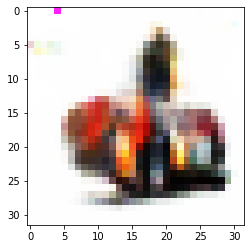

tf.Tensor(
[[0.08655169 0.28752148 0.11347428 0.11043642 0.01030383 0.08602531
  0.00442764 0.18564612 0.02786872 0.08774454]], shape=(1, 10), dtype=float32)
Step: 19, Loss: 1.4651854038238525


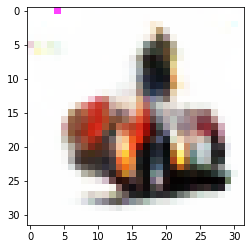

In [11]:
# Mixelt label-ök súly szerint

input_data = {
    "airplane": 0.0,
    "automobile": 0.5,
    "bird": 0.0,
    "cat": 0.0,
    "deer": 0.0,
    "dog": 0.0,
    "frog": 0.0,
    "horse": 0.5,
    "ship": 0.0,
    "truck": 0.0
}

# Visszakeresés a valószínűségi értékek alapján
mixed_label = make_onehot_from_dict(input_data)

starting_noise = tf.random.truncated_normal([1, latent_dim])
mixed_noise, _, _ =\
        gradient_descent_momentum(mixed_label, starting_noise, 0.05, 0.5, 20, verbose=True)